In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
from pathlib import Path
from freqtrade.configuration import Configuration
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import math
import pathlib

config = Configuration.from_files(['user_data/config_binance_zone.json'])
# Optionally, use existing configuration file
# config = Configuration.from_files(["config.json"])

# Define some constants
config["timeframe"] = "4h"
# Name of the strategy class
config["strategy"] = "YoyoActionStrategy"
# Location of the data
data_location = Path(config['user_data_dir'], 'data', 'binance')
# print("Data path "+data_location)
# Pair to analyze - Only use one pair here
pair = "BTC/USDT"

In [4]:
backtest_dir_1 = config["user_data_dir"] / "backtest_results/backtest-result-MACD-2021-12-15_14-39-54.json"

In [5]:
from freqtrade.data.history import load_pair_history

dataFrame = load_pair_history(datadir=data_location,
                            timeframe=config["timeframe"],
                            pair=pair)

# Confirm success
print("Loaded " + str(len(dataFrame)) + f" rows of data for {pair} from {data_location}")
dataFrame.head()

Loaded 9469 rows of data for BTC/USDT from /freqtrade/user_data/data/binance


,date,open,high,low,close,volume
0,2017-08-17 04:00:00+00:00,4261.48,4349.99,4261.32,4349.99,82.088865
1,2017-08-17 08:00:00+00:00,4333.32,4485.39,4333.32,4427.30,63.619882
2,2017-08-17 12:00:00+00:00,4436.06,4485.39,4333.42,4352.34,174.562001
3,2017-08-17 16:00:00+00:00,4352.33,4354.84,4200.74,4325.23,225.109716
4,2017-08-17 20:00:00+00:00,4307.56,4369.69,4258.56,4285.08,249.769913


In [6]:
#dataFrame.index = pd.DatetimeIndex(dataFrame.index)
#list(dataFrame.columns)[0]
dataFrame.set_index(['date'])

,open,high,low,close,volume
date,,,,,
2017-08-17 04:00:00+00:00,4261.48,4349.99,4261.32,4349.99,82.088865
2017-08-17 08:00:00+00:00,4333.32,4485.39,4333.32,4427.30,63.619882
2017-08-17 12:00:00+00:00,4436.06,4485.39,4333.42,4352.34,174.562001
2017-08-17 16:00:00+00:00,4352.33,4354.84,4200.74,4325.23,225.109716
2017-08-17 20:00:00+00:00,4307.56,4369.69,4258.56,4285.08,249.769913
...,...,...,...,...,...
2021-12-11 12:00:00+00:00,48240.43,48943.92,48160.00,48747.02,3968.264310
2021-12-11 16:00:00+00:00,48745.11,49276.00,48385.98,48407.25,4611.816290
2021-12-11 20:00:00+00:00,48407.25,49485.71,48390.22,49389.99,3455.476680


In [7]:
dataFrame.head()

,date,open,high,low,close,volume
0,2017-08-17 04:00:00+00:00,4261.48,4349.99,4261.32,4349.99,82.088865
1,2017-08-17 08:00:00+00:00,4333.32,4485.39,4333.32,4427.30,63.619882
2,2017-08-17 12:00:00+00:00,4436.06,4485.39,4333.42,4352.34,174.562001
3,2017-08-17 16:00:00+00:00,4352.33,4354.84,4200.74,4325.23,225.109716
4,2017-08-17 20:00:00+00:00,4307.56,4369.69,4258.56,4285.08,249.769913


In [8]:
# dataFrame = dataFrame.drop(columns=[list(dataFrame.columns)[0]])
# list(dataFrame.columns)[4]
df=dataFrame.iloc[:,0:1]
df['close'] = dataFrame['close']
df.set_index(['date'])


,close
date,
2017-08-17 04:00:00+00:00,4349.99
2017-08-17 08:00:00+00:00,4427.30
2017-08-17 12:00:00+00:00,4352.34
2017-08-17 16:00:00+00:00,4325.23
2017-08-17 20:00:00+00:00,4285.08
...,...
2021-12-11 12:00:00+00:00,48747.02
2021-12-11 16:00:00+00:00,48407.25
2021-12-11 20:00:00+00:00,49389.99


In [9]:
df['1d'] = df['close'].shift(-1)


In [10]:
for d in range(2, 41):
    col = "%dd" % d
    df[col] = df['close'].shift(-1 * d)
#df.set_index(['date'])
df.index = df['date']
df = df.drop(columns=['date'])

In [11]:
df = df.dropna()
X = df.iloc[:, :33]
y = df.iloc[:, 33:]
X.head()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,23d,24d,25d,26d,27d,28d,29d,30d,31d,32d
date,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4349.99,4427.30,4352.34,4325.23,4285.08,4292.39,4300.25,4340.31,4236.89,4136.28,...,4084.76,4043.63,4023.11,4022.00,4027.05,4016.00,3862.39,3798.08,3866.48,3858.23
2017-08-17 08:00:00+00:00,4427.30,4352.34,4325.23,4285.08,4292.39,4300.25,4340.31,4236.89,4136.28,4108.37,...,4043.63,4023.11,4022.00,4027.05,4016.00,3862.39,3798.08,3866.48,3858.23,3984.24
2017-08-17 12:00:00+00:00,4352.34,4325.23,4285.08,4292.39,4300.25,4340.31,4236.89,4136.28,4108.37,4138.55,...,4023.11,4022.00,4027.05,4016.00,3862.39,3798.08,3866.48,3858.23,3984.24,4040.00
2017-08-17 16:00:00+00:00,4325.23,4285.08,4292.39,4300.25,4340.31,4236.89,4136.28,4108.37,4138.55,4033.47,...,4022.00,4027.05,4016.00,3862.39,3798.08,3866.48,3858.23,3984.24,4040.00,4100.41
2017-08-17 20:00:00+00:00,4285.08,4292.39,4300.25,4340.31,4236.89,4136.28,4108.37,4138.55,4033.47,3957.60,...,4027.05,4016.00,3862.39,3798.08,3866.48,3858.23,3984.24,4040.00,4100.41,4074.88


In [12]:
y.head()

,33d,34d,35d,36d,37d,38d,39d,40d
date,,,,,,,,
2017-08-17 04:00:00+00:00,3984.24,4040.00,4100.41,4074.88,4237.99,4197.05,4117.07,4114.01
2017-08-17 08:00:00+00:00,4040.00,4100.41,4074.88,4237.99,4197.05,4117.07,4114.01,4113.58
2017-08-17 12:00:00+00:00,4100.41,4074.88,4237.99,4197.05,4117.07,4114.01,4113.58,4153.32
2017-08-17 16:00:00+00:00,4074.88,4237.99,4197.05,4117.07,4114.01,4113.58,4153.32,4202.00
2017-08-17 20:00:00+00:00,4237.99,4197.05,4117.07,4114.01,4113.58,4153.32,4202.00,4222.00


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [14]:
X_train.shape
X_test.shape

X_train

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,23d,24d,25d,26d,27d,28d,29d,30d,31d,32d
date,,,,,,,,,,,,,,,,,,,,,
2020-07-25 00:00:00+00:00,9581.58,9568.50,9574.29,9593.19,9674.14,9700.42,9677.69,9716.54,9970.87,9961.83,...,10906.27,10978.27,11015.11,11101.00,11162.01,11204.59,11100.53,10983.56,10941.64,10926.03
2020-05-17 04:00:00+00:00,9540.99,9522.08,9822.32,9771.00,9680.04,9860.51,9785.71,9634.89,9670.96,9701.70,...,9483.37,9457.83,9389.97,9084.38,9065.53,9068.65,8995.55,9081.81,9166.00,9222.69
2021-09-18 16:00:00+00:00,48266.00,48292.74,47844.88,48157.70,47327.73,47646.72,47376.72,47241.75,45542.76,44824.89,...,43222.96,43384.90,43543.61,44074.57,44229.99,43648.15,43747.63,44767.57,44865.26,44283.03
2018-06-06 00:00:00+00:00,7595.00,7619.15,7619.00,7650.50,7526.87,7658.84,7722.28,7708.31,7696.23,7691.43,...,7491.73,7261.03,7185.53,7235.10,7228.78,6839.00,6764.99,6768.60,6625.00,6770.56
2021-03-30 20:00:00+00:00,58746.57,58608.63,58173.83,58015.02,59304.75,58553.12,58740.55,59119.02,58817.77,58584.32,...,58597.04,57051.94,57492.42,57614.52,57275.55,57918.11,57953.86,58202.01,57467.12,57250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-20 16:00:00+00:00,6060.54,6010.01,6110.01,6091.92,6116.98,6149.99,6024.07,6024.97,5950.24,5907.11,...,5637.96,5635.07,5477.03,5515.96,5541.51,5469.98,5456.11,5580.07,5689.99,5719.99
2018-04-22 08:00:00+00:00,8916.01,8940.67,8881.00,8787.02,8861.52,8942.39,8910.02,8898.00,8847.37,8934.01,...,8847.97,8857.01,8806.10,8881.54,9266.00,9143.01,9240.97,9309.00,9241.21,9089.00
2020-05-19 20:00:00+00:00,9775.53,9724.40,9764.51,9731.21,9414.50,9531.99,9511.43,9483.37,9457.83,9389.97,...,9180.98,9179.15,9192.76,9255.53,9119.00,9055.74,9018.45,8720.34,8786.57,8867.31


In [15]:
from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators=100)
regressor = RandomForestRegressor(
    n_estimators=100,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,   
    #min_impurity_split=None,
    #min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=True,
    n_jobs=16,
    random_state=None,
    verbose=1,
    warm_start=False)
#regressor.fit(X_train, y_train)
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
#            verbose=0, warm_start=False)

In [16]:
regressor.fit(X_train, y_train)

/home/ftuser/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    2.1s finished


RandomForestRegressor(criterion='mse', n_jobs=16, oob_score=True, verbose=1)

In [17]:
list(df.columns)[0]

'close'

In [18]:
df['close'] = df[list(df.columns)[0]]
df.head()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
date,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4349.99,4427.30,4352.34,4325.23,4285.08,4292.39,4300.25,4340.31,4236.89,4136.28,...,3866.48,3858.23,3984.24,4040.00,4100.41,4074.88,4237.99,4197.05,4117.07,4114.01
2017-08-17 08:00:00+00:00,4427.30,4352.34,4325.23,4285.08,4292.39,4300.25,4340.31,4236.89,4136.28,4108.37,...,3858.23,3984.24,4040.00,4100.41,4074.88,4237.99,4197.05,4117.07,4114.01,4113.58
2017-08-17 12:00:00+00:00,4352.34,4325.23,4285.08,4292.39,4300.25,4340.31,4236.89,4136.28,4108.37,4138.55,...,3984.24,4040.00,4100.41,4074.88,4237.99,4197.05,4117.07,4114.01,4113.58,4153.32
2017-08-17 16:00:00+00:00,4325.23,4285.08,4292.39,4300.25,4340.31,4236.89,4136.28,4108.37,4138.55,4033.47,...,4040.00,4100.41,4074.88,4237.99,4197.05,4117.07,4114.01,4113.58,4153.32,4202.00
2017-08-17 20:00:00+00:00,4285.08,4292.39,4300.25,4340.31,4236.89,4136.28,4108.37,4138.55,4033.47,3957.60,...,4100.41,4074.88,4237.99,4197.05,4117.07,4114.01,4113.58,4153.32,4202.00,4222.00


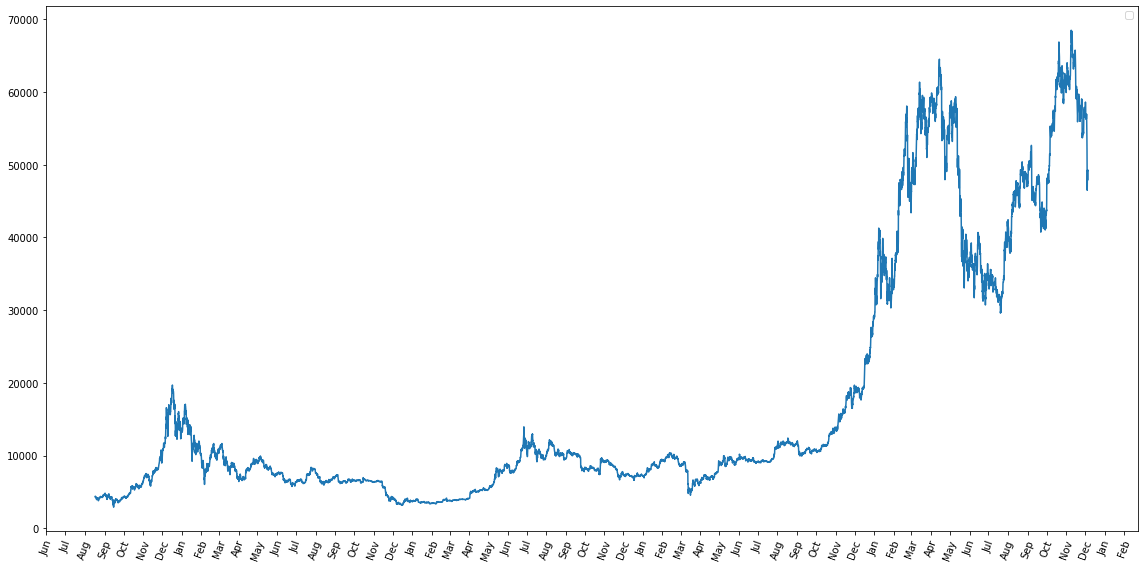

In [19]:
from matplotlib.dates import MonthLocator, date2num, DateFormatter

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(16)
fig.set_figheight(8)

ax.plot(df.index, df.close)

lctr = MonthLocator()  # every month
frmt = DateFormatter('%b')  # %b gives us Jan, Feb...

ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)

ax.legend()

plt.xticks(rotation=70)
plt.tight_layout()
plt.show();

In [20]:
regressor.score(X_test, y_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9977560708630553

In [21]:
regressor.feature_importances_

array([1.09172461e-04, 8.28874074e-05, 6.28758742e-05, 6.85688743e-05,
       8.47123818e-05, 6.06373174e-05, 1.77936417e-02, 7.97392694e-02,
       6.21888474e-02, 2.66823001e-02, 3.54574585e-02, 8.85766330e-02,
       1.06290868e-01, 6.21540306e-02, 6.21845012e-02, 8.86451081e-02,
       7.97207675e-02, 5.31991212e-02, 4.43374459e-02, 1.77962167e-02,
       7.49247753e-05, 8.98760624e-03, 8.96253851e-03, 8.04325418e-05,
       7.98507669e-05, 8.94424053e-03, 1.18338619e-04, 1.42486455e-04,
       9.00671825e-03, 7.49718741e-04, 2.10498320e-04, 2.18919623e-02,
       1.15515620e-01])

In [22]:
y_test.head()

,33d,34d,35d,36d,37d,38d,39d,40d
date,,,,,,,,
2019-12-01 12:00:00+00:00,7529.74,7521.48,7524.98,7510.07,7520.00,7488.21,7403.91,7434.63
2021-10-04 00:00:00+00:00,54977.29,54656.81,54949.72,55049.15,55668.81,55144.99,55373.01,55450.25
2021-05-18 16:00:00+00:00,36645.79,37600.01,37539.63,39606.10,38796.29,38304.51,38985.06,36537.16
2021-11-20 04:00:00+00:00,58853.83,58960.36,57900.91,56957.86,53719.30,54341.55,54326.76,53726.53
2020-10-03 12:00:00+00:00,10887.19,10894.00,11050.43,11086.58,11034.28,11050.64,11412.96,11381.30


In [23]:
y_predicted = regressor.predict(X_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


In [24]:
y_predicted

array([[ 7468.916 ,  7440.8832,  7465.6142, ...,  7480.5261,  7479.964 ,
         7482.8122],
       [54863.3344, 54935.8039, 55049.647 , ..., 55187.8209, 55255.5092,
        55534.9152],
       [35055.775 , 35248.3408, 35526.8825, ..., 36310.1678, 36425.899 ,
        36271.5287],
       ...,
       [ 8466.1461,  8418.3048,  8378.0707, ...,  8277.8233,  8247.3506,
         8184.3921],
       [ 6872.9756,  6891.5827,  6906.4863, ...,  6930.9346,  6957.813 ,
         7013.5677],
       [ 7823.3544,  7889.5289,  7985.6906, ...,  8105.4604,  8155.359 ,
         8127.9255]])

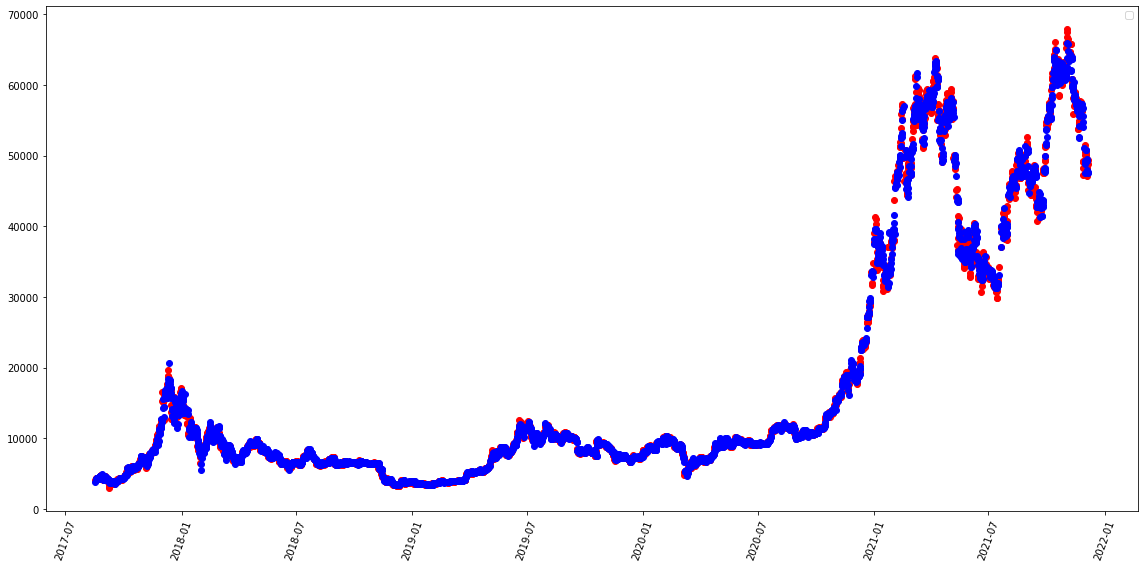

In [25]:
fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(16)
fig.set_figheight(8)

ax.plot(y_test.index, y_test['40d'], 'ro')
ax.plot(y_test.index, y_predicted[:, 7], 'bo')

ax.legend()

plt.xticks(rotation=70)
plt.tight_layout()
plt.show();

In [51]:
from joblib import dump
dump(regressor, 'rf_regressor.joblib')


RandomForestRegressor(criterion='mse', n_jobs=16, oob_score=True, verbose=1)

In [37]:
df_hold_buy = pd.read_csv("user_data/notebooks/packtpub-src/buy_and_hold.csv")
df_hold_buy['timestamp'] = df_hold_buy['Unnamed: 0']
df_hold_buy.index = df_hold_buy.timestamp
df_hold_buy = df_hold_buy.drop(['timestamp', 'Unnamed: 0'], axis=1)
df_hold_buy.head()

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-03 21:00:00+00:00,116.15,NaN,0.000000,NaN,0.007650,NaN,NaN,0.000,1.000000e+07,0.0,...,0.0,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2017-01-04 21:00:00+00:00,116.02,0.000231,-0.000021,-0.023304,0.013645,0.019097,0.012088,-405515.655,9.594484e+06,405310.0,...,0.0,0.0,0,-11.224972,1.000000e+07,0.0,0.0,2,"[{'amount': 1000, 'dt': Timestamp('2017-01-04 ...",0.0
2017-01-05 21:00:00+00:00,116.61,0.000279,-0.000006,0.002383,0.012840,0.070899,-0.002696,-405865.830,9.188619e+06,811320.0,...,0.0,0.0,0,-2.739988,9.594484e+06,405310.0,405310.0,3,"[{'amount': 1000, 'dt': Timestamp('2017-01-05 ...",0.0
2017-01-06 21:00:00+00:00,117.91,0.006364,0.000793,0.063365,0.016463,0.058148,-0.012984,-409967.880,8.778651e+06,1229280.0,...,0.0,0.0,0,306.084838,9.188619e+06,811320.0,811320.0,4,"[{'amount': 1000, 'dt': Timestamp('2017-01-06 ...",0.0
2017-01-09 21:00:00+00:00,118.99,0.007541,0.001717,0.124275,0.013108,0.072753,-0.057285,-413119.455,8.365531e+06,1651640.0,...,0.0,0.0,0,592.505264,8.778651e+06,1229280.0,1229280.0,5,"[{'amount': 1000, 'dt': Timestamp('2017-01-09 ...",0.0


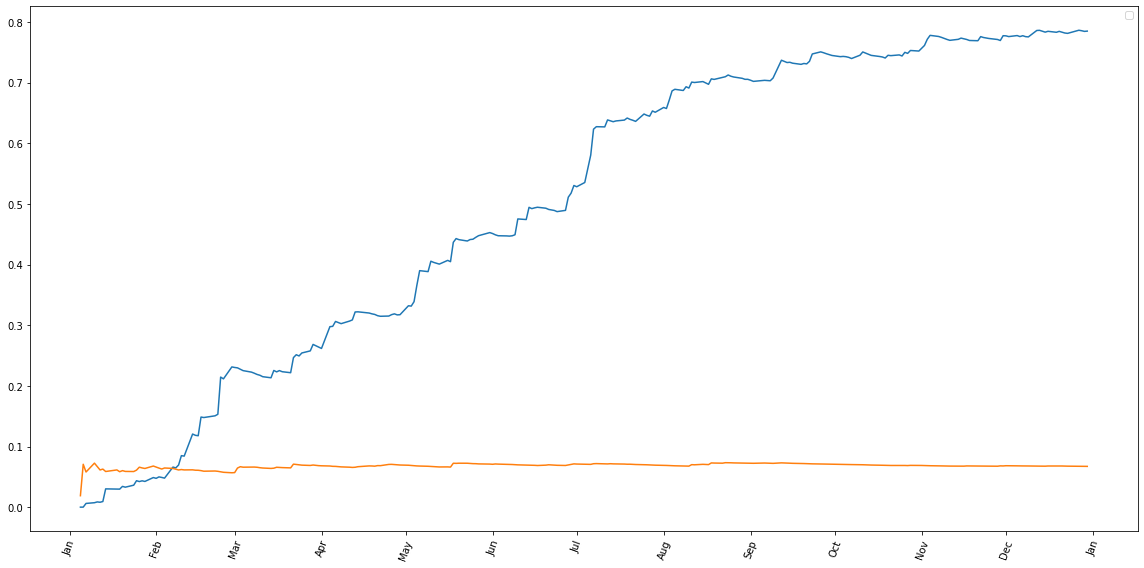

In [40]:
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, date2num, DateFormatter

df_hold_buy.index = pd.DatetimeIndex(df_hold_buy.index)

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(16)
fig.set_figheight(8)

ax.plot(df_hold_buy.index, df_hold_buy.algo_volatility)
ax.plot(df_hold_buy.index, df_hold_buy.benchmark_volatility)

lctr = MonthLocator()  # every month
frmt = DateFormatter('%b')  # %b gives us Jan, Feb...

ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)


plt.xticks(rotation=70)
plt.tight_layout()

plt.legend()
plt.show();

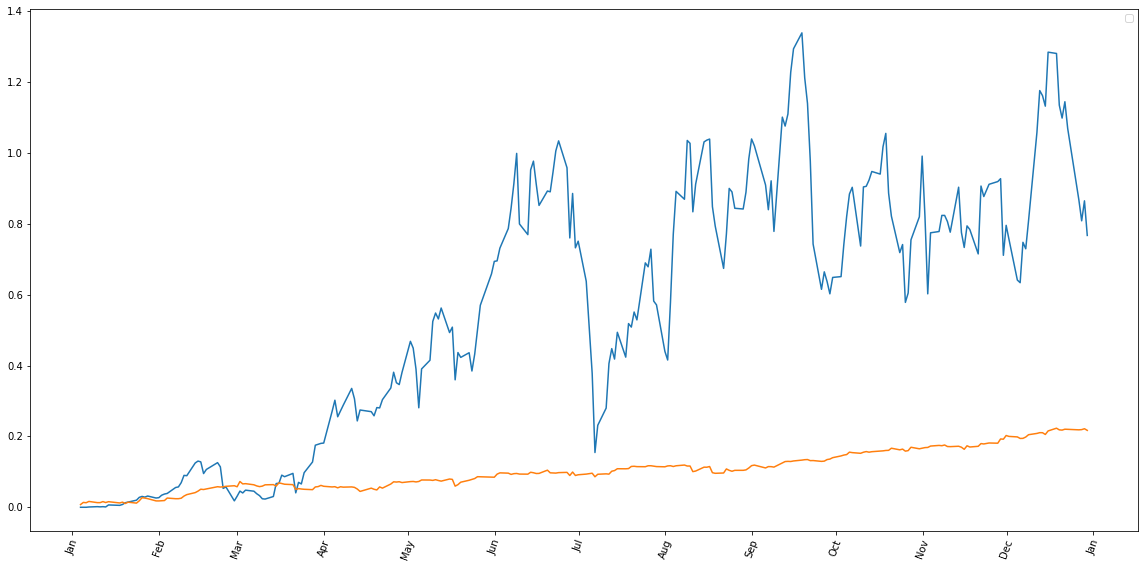

In [42]:
fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(16)
fig.set_figheight(8)

ax.plot(df_hold_buy.index, df_hold_buy.algorithm_period_return)
ax.plot(df_hold_buy.index, df_hold_buy.benchmark_period_return)

lctr = MonthLocator()  # every month
frmt = DateFormatter('%b')  # %b gives us Jan, Feb...

ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)


plt.xticks(rotation=70)
plt.tight_layout()

plt.legend()
plt.show();

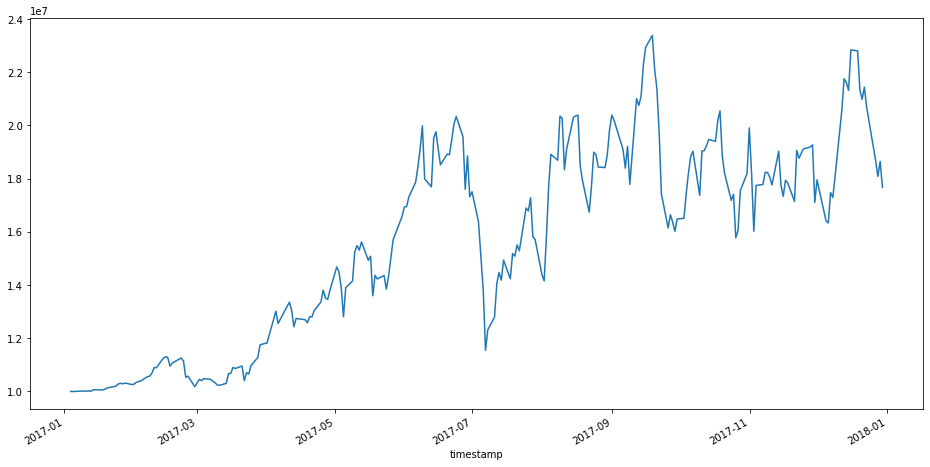

In [44]:
df_hold_buy.portfolio_value.plot(figsize=(16, 8));

In [49]:
'${:,.2f}'.format(df_hold_buy.capital_used.sum())


'$-92,652,871.01'

In [50]:
'${:,.2f}'.format(df_hold_buy.portfolio_value[-1])


'$17,670,488.99'